<a href="https://colab.research.google.com/github/manmeet3/Masters_Project/blob/master/wip_colabs/AnoGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd '/content/drive/My Drive/Masters_Project/Datasets/new1'

/content/drive/My Drive/Masters_Project/Datasets/new1


In [5]:
#!git clone https://github.com/tSchlegl/f-AnoGAN.git

pip install split_folders

import split-folders

input_folder = "input_path"

output = "output_path" #where you want the split datasets saved. one will be created if none is set

split_folders.ratio('input_folder', output="output", seed=42, ratio=(.8, .1, .1)) 

Convert jpg to png using PIL

Remove jpg images from all dirs

TODO: Chunk the MRI images into 64*64 images

# f-anoGan-TF
Input: MNIST 28 * 28 * 1 images from https://github.com/YeongHyeon/f-AnoGAN-TF/blob/master/source/datamanager.py

https://github.com/Xiaohui9607/f_anogan_pytorch

In [6]:
!ls

AnoGAN.ipynb  f-AnoGAN		f-AnoGAN-TF		normal_brain
brain_tumor   f_anogan_pytorch	kaggle_tumor_detection


In [7]:
# pip install --user gast==0.2.2

In [8]:
import tensorflow as tf

In [9]:
(x_tr, y_tr), (x_te, y_te) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [10]:
x_tr.shape

(60000, 28, 28)

In [11]:
y_tr.shape

(60000,)

# Reshape all images in the kaggle tumor dataset folder to be same dimensions
Use fastai augmentations and output images to respective folders

512 * 512

In [12]:
import glob
yes_files = glob.glob('./kaggle_tumor_detection/brain_tumor_dataset/yes/*')
no_files = glob.glob('./kaggle_tumor_detection/brain_tumor_dataset/no/*')

In [13]:
# https://stackoverflow.com/questions/273946/how-do-i-resize-an-image-using-pil-and-maintain-its-aspect-ratio
# https://docs.fast.ai/vision.augment.html
import os, sys
from PIL import Image

size = 512, 512

def save_resized_images(file_paths_list, output_relative_path):
  for infile in file_paths_list:
    #outfile = os.path.splitext(infile)[0] + ".jpeg"
    filename = os.path.basename(infile)
    outfile = output_relative_path + filename
    print(outfile)
    if infile != outfile:
        try:
            im = Image.open(infile)
            #im.thumbnail(size, Image.ANTIALIAS)
            im = im.resize(size)
            im.save(outfile, "JPEG")
        except IOError:
            print ("cannot create thumbnail for '%s'" % infile)

In [14]:
#save_resized_images(yes_files, "./kaggle_tumor_detection/resized_yes/")

In [15]:
!ls "./kaggle_tumor_detection/resized_yes/"

Y100.JPG  Y12.jpg   Y166.JPG  Y195.JPG	Y254.jpg  Y38.jpg  Y59.JPG  Y82.jpg
Y101.jpg  Y13.jpg   Y167.JPG  Y19.JPG	Y255.JPG  Y39.jpg  Y60.jpg  Y85.JPG
Y102.jpg  Y146.JPG  Y168.jpg  Y1.jpg	Y256.JPG  Y3.jpg   Y61.jpg  Y86.JPG
Y103.jpg  Y147.JPG  Y169.jpg  Y20.jpg	Y257.jpg  Y40.JPG  Y62.jpg  Y89.JPG
Y104.jpg  Y148.JPG  Y16.JPG   Y21.jpg	Y258.JPG  Y41.jpg  Y65.JPG  Y8.jpg
Y105.jpg  Y14.jpg   Y170.JPG  Y22.jpg	Y259.JPG  Y42.jpg  Y66.JPG  Y90.jpg
Y106.jpg  Y153.jpg  Y17.jpg   Y23.JPG	Y25.jpg   Y44.JPG  Y67.JPG  Y91.jpg
Y107.jpg  Y154.jpg  Y180.jpg  Y242.JPG	Y26.jpg   Y45.JPG  Y69.jpg  Y92.jpg
Y108.jpg  Y155.JPG  Y181.jpg  Y243.JPG	Y27.jpg   Y46.jpg  Y6.jpg   Y92.png
Y109.JPG  Y156.JPG  Y182.JPG  Y244.JPG	Y28.jpg   Y47.JPG  Y70.jpg  Y95.jpg
Y10.jpg   Y157.JPG  Y183.jpg  Y245.jpg	Y29.jpg   Y49.JPG  Y71.JPG  Y96.jpg
Y111.JPG  Y158.JPG  Y184.JPG  Y246.JPG	Y2.jpg	  Y4.jpg   Y73.jpg  Y97.JPG
Y112.JPG  Y159.JPG  Y185.jpg  Y247.JPG	Y30.jpg   Y50.JPG  Y74.jpg  Y98.JPG
Y113.JPG  Y15.jpg   Y186.jpg  Y248

In [16]:
#save_resized_images(no_files, "./kaggle_tumor_detection/resized_no/")

In [17]:
!ls "./kaggle_tumor_detection/resized_no/"

'10 no.jpg'  '27 no.jpg'  '42 no.jpg'	 N16.jpg       No14.jpg    'no 8.jpg'
'11 no.jpg'  '28 no.jpg'  '43 no.jpg'	 N17.jpg       No15.jpg    'no 90.jpg'
'12 no.jpg'  '29 no.jpg'   44no.jpg	 N19.JPG       No16.jpg    'no 91.jpeg'
'13 no.jpg'  '2 no.jpeg'  '45 no.jpg'	 N1.JPG        No17.jpg    'no 923.jpg'
'14 no.jpg'  '30 no.jpg'  '46 no.jpg'	 N20.JPG       No18.jpg    'no 92.jpg'
'15 no.jpg'  '31 no.jpg'  '47 no.jpg'	 N21.jpg       No19.jpg    'no 94.jpg'
'17 no.jpg'  '32 no.jpg'  '48 no.jpeg'	 N22.JPG      'no 1.jpg'   'no 95.jpg'
'18 no.jpg'  '33 no.jpg'  '49 no.jpg'	 N26.JPG       No20.jpg    'no 96.jpg'
'19 no.jpg'  '34 no.jpg'  '4 no.jpg'	 N2.JPG        No21.jpg    'no 97.jpg'
'1 no.jpeg'  '35 no.jpg'  '50 no.jpg'	 N3.jpg        No22.jpg    'no 98.jpg'
'20 no.jpg'  '36 no.jpg'  '5 no.jpg'	 N5.jpg       'no 2.jpg'   'no 99.jpg'
'21 no.jpg'  '37 no.jpg'  '6 no.jpg'	 N6.jpg       'no 3.jpg'   'no 9.png'
'22 no.jpg'  '38 no.jpg'  '7 no.jpg'	'no 100.jpg'  'no 4.jpg'    no.jpg
'23 no.j

In [18]:
# !mkdir "./kaggle_tumor_detection/augmented_no/"
# !mkdir "./kaggle_tumor_detection/augmented_yes/"

In [19]:
!ls ./kaggle_tumor_detection/

archive.zip   augmented_yes	   output      resized_yes
augmented_no  brain_tumor_dataset  resized_no  source.txt


In [20]:
resized_yes_files = glob.glob('./kaggle_tumor_detection/resized_yes/*')
resized_no_files = glob.glob('./kaggle_tumor_detection/resized_no/*')

In [21]:
#https://www.kaggle.com/anisayari/simple-data-augmentation-fastai

In [22]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
import matplotlib.pyplot as plt

In [23]:
def get_img(img_path): 
  return open_image(img_path)

In [24]:
def plots_of_one_image(img_path, tfms, rows=1, cols=3, width=15, height=5, **kwargs):
    img = get_img(img_path)
    [img.apply_tfms(tfms, **kwargs).show(ax=ax) 
     for i,ax in enumerate(plt.subplots(rows,cols,figsize=(width,height))[1].flatten())]    

Look at first few images

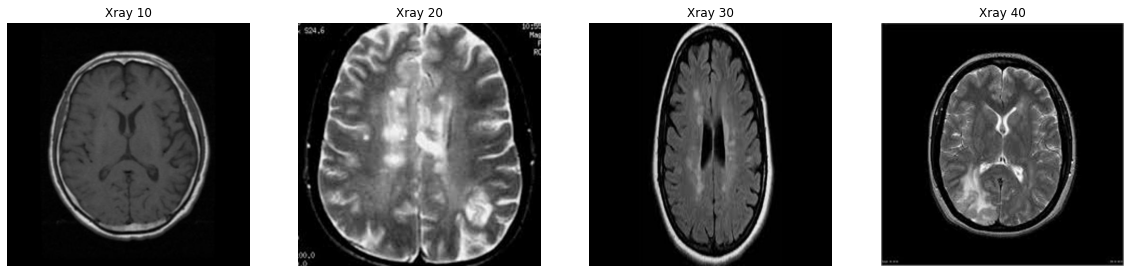

In [25]:
_,axs = plt.subplots(1,4,figsize=(20,10))
for (i,ax),(img_,j) in zip(enumerate(axs),[(get_img(resized_no_files[j]),j) 
                                           for j in [10,20,30,40]]):
    img_.show(ax=ax, title=f'Xray {j}')

padding_mode = "border"

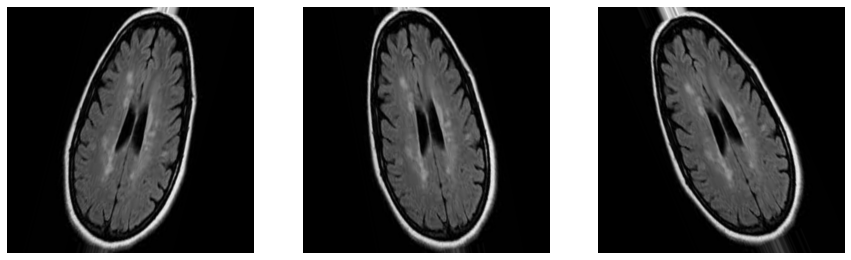

In [26]:
tfms = [rotate(degrees=(-30,30), p=1.0)]
plots_of_one_image(resized_no_files[30],tfms,padding_mode='border')

padding_mode = "reflection"

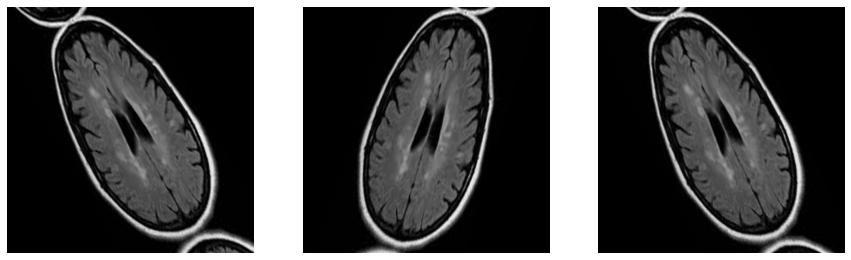

In [27]:
tfms = [rotate(degrees=(-30,30), p=1.0)]
plots_of_one_image(resized_no_files[30],tfms,padding_mode='reflection')

Brightness

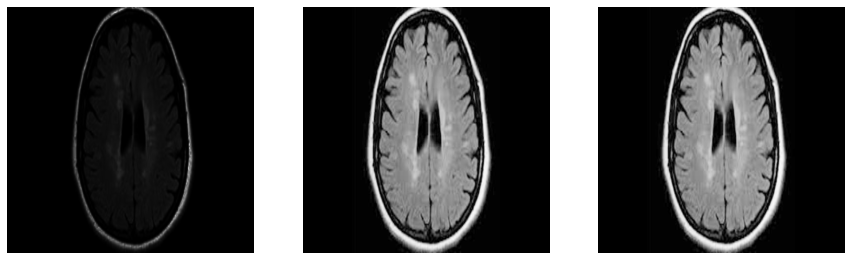

In [28]:
tfms = [brightness(change=(0.1, 0.9))]
plots_of_one_image(resized_no_files[30],tfms)

Contrast

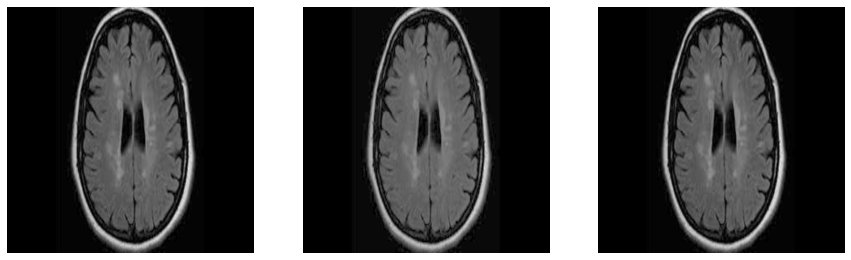

In [29]:
tfms = [contrast(scale=(0.5, 2.), p=1.)]
plots_of_one_image(resized_no_files[30],tfms)

Jitter

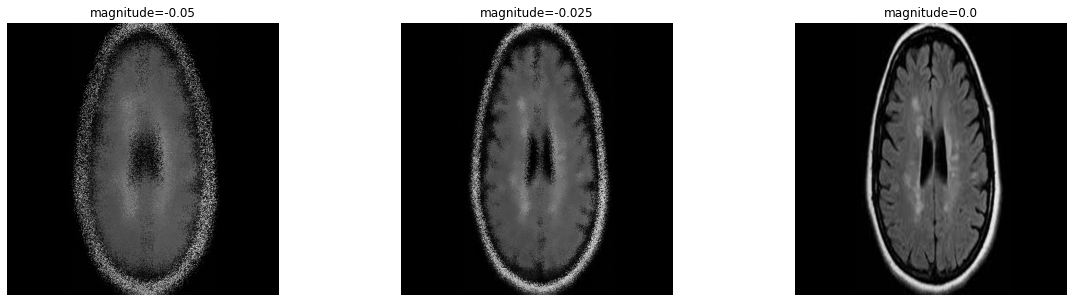

In [30]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
for magnitude, ax in zip(np.linspace(-0.05,0.05,5), axs):
    tfms = [jitter(magnitude=magnitude, p=1.)]
    get_img(resized_no_files[30]).apply_tfms(tfms).show(ax=ax,title="magnitude={}".format(magnitude))

Perspective

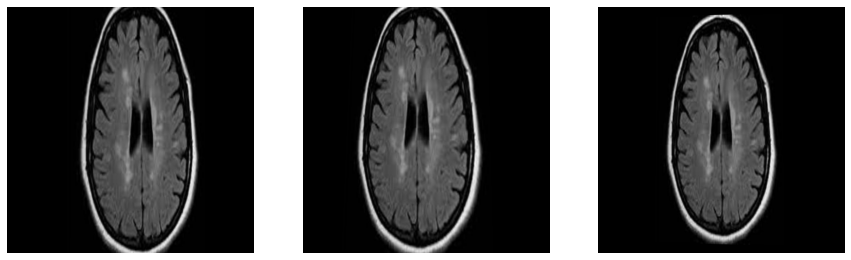

In [31]:
tfms = [symmetric_warp(magnitude=(-0.2,0.2), p=1.)]
plots_of_one_image(resized_no_files[30],tfms,padding_mode='zeros')

Zoom

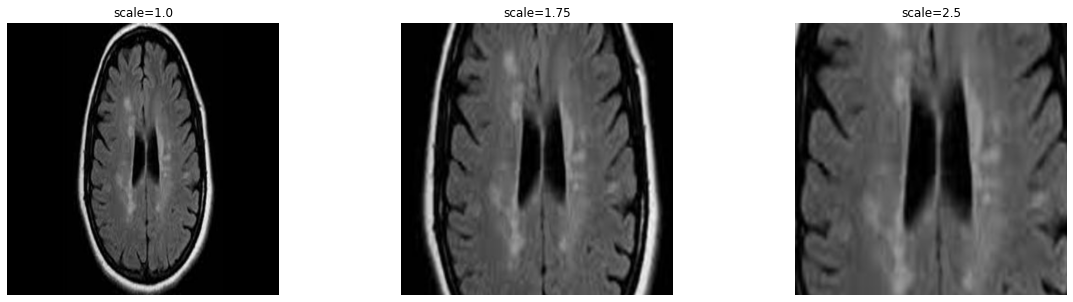

In [32]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
for scale, ax in zip(np.linspace(1.,2.5,3), axs):
    tfms = [zoom(scale=scale, p=1.)]
    get_img(resized_no_files[30]).apply_tfms(tfms).show(ax=ax,title='scale={}'.format(scale))

# Augment and save resized images

In [40]:
def save_augmentation(img_path, tfms, save_path, **kwargs):
    img = get_img(img_path)
    img.apply_tfms(tfms, **kwargs)
    img.save(save_path)

In [41]:
#resized_yes_files
def augment_and_save(files_list, tfms, tfm_name, **kwargs):
  file_num = 0
  for f in files_list:
    save_path = os.path.splitext(f)[0] + "_" + tfm_name + "_" + str(file_num) + "_" + ".jpg"
    print(save_path)
    save_augmentation(f, tfms, save_path, **kwargs)
    file_num += 1


In [42]:
# Rotated yes (tumor) images
tfms = [rotate(degrees=(-30,30), p=1.0)]
augment_and_save(resized_yes_files, tfms, "rotate", padding_mode='border')

./kaggle_tumor_detection/resized_yes/Y46_rotate_0_.jpg
./kaggle_tumor_detection/resized_yes/Y81_rotate_1_.jpg
./kaggle_tumor_detection/resized_yes/Y71_rotate_2_.jpg
./kaggle_tumor_detection/resized_yes/Y252_rotate_3_.jpg
./kaggle_tumor_detection/resized_yes/Y4_rotate_4_.jpg
./kaggle_tumor_detection/resized_yes/Y155_rotate_5_.jpg
./kaggle_tumor_detection/resized_yes/Y188_rotate_6_.jpg
./kaggle_tumor_detection/resized_yes/Y258_rotate_7_.jpg
./kaggle_tumor_detection/resized_yes/Y47_rotate_8_.jpg
./kaggle_tumor_detection/resized_yes/Y28_rotate_9_.jpg
./kaggle_tumor_detection/resized_yes/Y34_rotate_10_.jpg
./kaggle_tumor_detection/resized_yes/Y156_rotate_11_.jpg
./kaggle_tumor_detection/resized_yes/Y256_rotate_12_.jpg
./kaggle_tumor_detection/resized_yes/Y20_rotate_13_.jpg
./kaggle_tumor_detection/resized_yes/Y91_rotate_14_.jpg
./kaggle_tumor_detection/resized_yes/Y259_rotate_15_.jpg
./kaggle_tumor_detection/resized_yes/Y2_rotate_16_.jpg
./kaggle_tumor_detection/resized_yes/Y113_rotate_17_.

In [45]:
# Rotated yes (tumor) images
tfms = [rotate(degrees=(-30,30), p=1.0)]
augment_and_save(resized_no_files, tfms, "rotate", padding_mode='border')

./kaggle_tumor_detection/resized_no/10 no_rotate_0_.jpg
./kaggle_tumor_detection/resized_no/1 no_rotate_1_.jpg
./kaggle_tumor_detection/resized_no/11 no_rotate_2_.jpg
./kaggle_tumor_detection/resized_no/7 no_rotate_3_.jpg
./kaggle_tumor_detection/resized_no/37 no_rotate_4_.jpg
./kaggle_tumor_detection/resized_no/44no_rotate_5_.jpg
./kaggle_tumor_detection/resized_no/45 no_rotate_6_.jpg
./kaggle_tumor_detection/resized_no/N16_rotate_7_.jpg
./kaggle_tumor_detection/resized_no/N22_rotate_8_.jpg
./kaggle_tumor_detection/resized_no/2 no_rotate_9_.jpg
./kaggle_tumor_detection/resized_no/48 no_rotate_10_.jpg
./kaggle_tumor_detection/resized_no/33 no_rotate_11_.jpg
./kaggle_tumor_detection/resized_no/3 no_rotate_12_.jpg
./kaggle_tumor_detection/resized_no/41 no_rotate_13_.jpg
./kaggle_tumor_detection/resized_no/35 no_rotate_14_.jpg
./kaggle_tumor_detection/resized_no/43 no_rotate_15_.jpg
./kaggle_tumor_detection/resized_no/42 no_rotate_16_.jpg
./kaggle_tumor_detection/resized_no/22 no_rotate_1

UnidentifiedImageError: ignored